In [1]:
import matplotlib.pyplot as plt
import padic
from fractions import Fraction
import random
import primes
%matplotlib inline

# p - Adic Norm 

This notebook explores the p-Adic norm and the metric induced by it. The building blocks for the p-adic norm are implimented in the file padic.py and will be used to illustrate the definitions. 

## p-Adic Ordinal on Integers

First we must start with the ordinal of p which is defined as follows for a prime p and an integer a:
$$ord_p (a) = m$$
where $m$ is the largest integer such that
$$a \equiv 0 (mod p^m).$$
This definition of a ordinal on the intgers is impliment in the function padic.find_p_ord_int(a,p), where a is an integer and p is a prime. 

In [2]:
def plot_int_0_to_n(n, p, function, include_print):
    '''To plot a function between 0 and n on all integers.'''
    y = []
    x = []
    for i in range(1,n+1):
        ord_int = function(i,p)
        if include_print == True:
            print(f'The {function} of {i} with respect to {p} is {ord_int}')
        y.append(ord_int)
        x.append(i)
    plt.scatter(x,y)

The <function find_p_ord_int at 0x1103cfe18> of 1 with respect to 2 is 0
The <function find_p_ord_int at 0x1103cfe18> of 2 with respect to 2 is 1
The <function find_p_ord_int at 0x1103cfe18> of 3 with respect to 2 is 0
The <function find_p_ord_int at 0x1103cfe18> of 4 with respect to 2 is 2
The <function find_p_ord_int at 0x1103cfe18> of 5 with respect to 2 is 0
The <function find_p_ord_int at 0x1103cfe18> of 6 with respect to 2 is 1
The <function find_p_ord_int at 0x1103cfe18> of 7 with respect to 2 is 0
The <function find_p_ord_int at 0x1103cfe18> of 8 with respect to 2 is 3
The <function find_p_ord_int at 0x1103cfe18> of 9 with respect to 2 is 0
The <function find_p_ord_int at 0x1103cfe18> of 10 with respect to 2 is 1


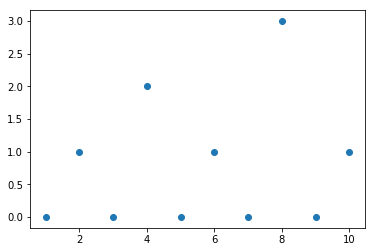

In [3]:
'''For the prime 2 lets see what the ordinal with respect to p is for integer values between 1 and 10'''
plot_int_0_to_n(10, 2, padic.find_p_ord_int, True)

You an see from the graph above that for all odd numbers $a$ you get that $ord_p a = 0$ since no power of 2 will divide an odd number. Then there is a layer for all even numbers are divisible by 2 once. Then 4 and 8 each have a value of 2 and 3 respectively because $2^2=4$ and $2^3=8$. 

The value of the ordinal of an integer will always be greater than or equal to zero and there is a cyclic nature to the values. For the prime 2, zero repeats every odd number, 1 repeats at each $4k +2$ for all integers $k$, (Reason: $4k + 2 = 2(2k+1)$ and $2k+1 \equiv 1 (mod 2)$ for all integers $k$). You can see this cyclic nature as you increase the upper range of your plot as you can see below. 

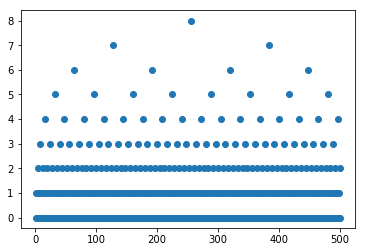

In [4]:
'''We can extend this and graph the ordinal of the integers between 1 and 500. 
    You can see the cyclic, layered pattern continues.'''
plot_int_0_to_n(500, 2, padic.find_p_ord_int, False)

The <function find_p_ord_int at 0x1103cfe18> of 1 with respect to 3 is 0
The <function find_p_ord_int at 0x1103cfe18> of 2 with respect to 3 is 0
The <function find_p_ord_int at 0x1103cfe18> of 3 with respect to 3 is 1
The <function find_p_ord_int at 0x1103cfe18> of 4 with respect to 3 is 0
The <function find_p_ord_int at 0x1103cfe18> of 5 with respect to 3 is 0
The <function find_p_ord_int at 0x1103cfe18> of 6 with respect to 3 is 1
The <function find_p_ord_int at 0x1103cfe18> of 7 with respect to 3 is 0
The <function find_p_ord_int at 0x1103cfe18> of 8 with respect to 3 is 0
The <function find_p_ord_int at 0x1103cfe18> of 9 with respect to 3 is 2
The <function find_p_ord_int at 0x1103cfe18> of 10 with respect to 3 is 0
The <function find_p_ord_int at 0x1103cfe18> of 11 with respect to 3 is 0
The <function find_p_ord_int at 0x1103cfe18> of 12 with respect to 3 is 1


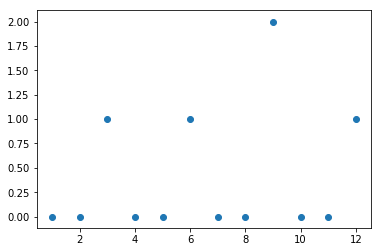

In [5]:
'''A similar pattern exist for other primes except now the cyclic nature is spaced out by the prime in question.'''
plot_int_0_to_n(12, 3, padic.find_p_ord_int, True)

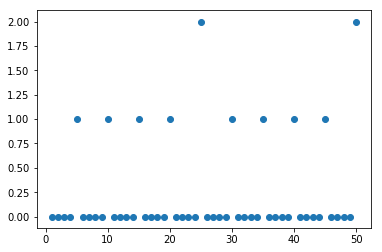

In [6]:
plot_int_0_to_n(50, 5, padic.find_p_ord_int, False)

## p-Adic Ordinal on Rationals

This definition of an ordinal can be extended to the Rationals. For a rational number $q = \frac{a}{b}$ for integers $a$ and $b$ and a prime $p$,
$$ord_p (q) = ord_p (\frac{a}{b}) = ord_p (a) - ord_p(b).$$

The function padic.find_p_ord(q,p) defines the ordinal of a rational $q$ for a prime $p$.

In [7]:
def plot_m_step_rationals_0_to_n(n, p, m, function, include_print):
    '''To plot a function between 0 and n on all rational numbers 
        of the form j/i for j in (0,i) and i in (2,n]'''
    x = [1]
    y = [function(n,p)]

    for i in range(2, m+1):
        step = Fraction(1,i)
        for j in range(1,int(n/step)):
            ord_frac = function(j*step,2)
            if include_print == True:
                print(f'The {function} of {j*step} with respect to {p} is {ord_frac}')
            x.append(j*step)
            y.append(ord_frac)
    plt.scatter(x,y)
    plt.xlim(0,n)

The <function find_p_ord at 0x1103d9c80> of 1/2 with respect to 2 is -1
The <function find_p_ord at 0x1103d9c80> of 1 with respect to 2 is 0
The <function find_p_ord at 0x1103d9c80> of 3/2 with respect to 2 is -1
The <function find_p_ord at 0x1103d9c80> of 2 with respect to 2 is 1
The <function find_p_ord at 0x1103d9c80> of 5/2 with respect to 2 is -1
The <function find_p_ord at 0x1103d9c80> of 3 with respect to 2 is 0
The <function find_p_ord at 0x1103d9c80> of 7/2 with respect to 2 is -1
The <function find_p_ord at 0x1103d9c80> of 1/3 with respect to 2 is 0
The <function find_p_ord at 0x1103d9c80> of 2/3 with respect to 2 is 1
The <function find_p_ord at 0x1103d9c80> of 1 with respect to 2 is 0
The <function find_p_ord at 0x1103d9c80> of 4/3 with respect to 2 is 2
The <function find_p_ord at 0x1103d9c80> of 5/3 with respect to 2 is 0
The <function find_p_ord at 0x1103d9c80> of 2 with respect to 2 is 1
The <function find_p_ord at 0x1103d9c80> of 7/3 with respect to 2 is 0
The <functio

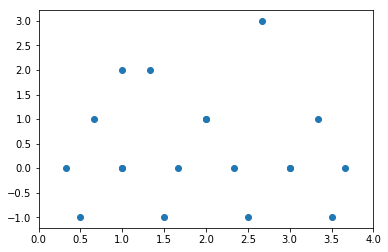

In [8]:
'''Now that we are considering rationals as inputs of our ordinal we can explore what a graph of these look like.'''
plot_m_step_rationals_0_to_n(4, 2, 3, padic.find_p_ord, True)

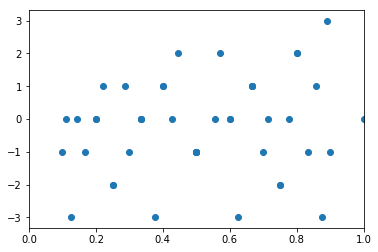

In [9]:
plot_m_step_rationals_0_to_n(1, 2, 10, padic.find_p_ord, False)

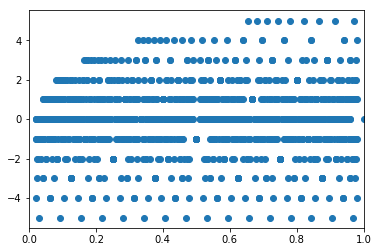

In [10]:
plot_m_step_rationals_0_to_n(1, 2, 50, padic.find_p_ord, False)

## Testing the Ordinal Function

This brings us to our first property based test. What we are going to use to test this ordinal is the fact that 
$$ ord_p(ab) = ord_p(a) + ord_p(b)$$
for all rational numbers $a$ and $b$. This works we can find integers $m$, $n$, $s$, $t$ such that $a=m p^n$ and $b = s p^t$  where $p$ does not divide $m$ or $s$. Note that any of these could be positive or negative, or zero. And $$ord_p(ab) = ord_p(msp^{(n+t)}) = n+t = ord_p(mp^n) + ord_p(sp^t) = ord_p(a) + ord_p(b)$$ 

We test by selecting random primes and random a and b then calculating:

padic.find_p_ord(a,p) + padic.find_p_ord(b,p) == padic.find_p_ord(a*b,p)

In [11]:
a = 190
b = 38
p=5
padic.find_p_ord(a,p) + padic.find_p_ord(b,p) == padic.find_p_ord(a*b,p)

True

## p-Adic Norm
Now we have the building blocks to define the p-Adic norm. For a non-zero rational number $q$,

$$|q|_p = \frac{1}{p^{ord_p(q)}}$$

and for zero,

$$|0|_p = 0$$

The <function p_norm at 0x1103d9d08> of 1 with respect to 2 is 1.0
The <function p_norm at 0x1103d9d08> of 2 with respect to 2 is 0.5
The <function p_norm at 0x1103d9d08> of 3 with respect to 2 is 1.0
The <function p_norm at 0x1103d9d08> of 4 with respect to 2 is 0.25
The <function p_norm at 0x1103d9d08> of 5 with respect to 2 is 1.0
The <function p_norm at 0x1103d9d08> of 6 with respect to 2 is 0.5
The <function p_norm at 0x1103d9d08> of 7 with respect to 2 is 1.0
The <function p_norm at 0x1103d9d08> of 8 with respect to 2 is 0.125
The <function p_norm at 0x1103d9d08> of 9 with respect to 2 is 1.0
The <function p_norm at 0x1103d9d08> of 10 with respect to 2 is 0.5


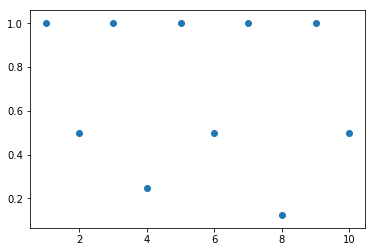

In [12]:
plot_int_0_to_n(10, 2, padic.p_norm, True)

When ploting the 2-Adic norm with of integers 

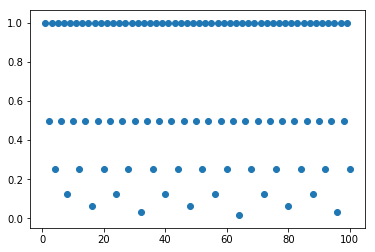

In [13]:
plot_int_0_to_n(100, 2, padic.p_norm, False)

The <function p_norm at 0x1103d9d08> of 1/2 with respect to 2 is 2.0
The <function p_norm at 0x1103d9d08> of 1/3 with respect to 2 is 1.0
The <function p_norm at 0x1103d9d08> of 2/3 with respect to 2 is 0.5
The <function p_norm at 0x1103d9d08> of 1/4 with respect to 2 is 4.0
The <function p_norm at 0x1103d9d08> of 1/2 with respect to 2 is 2.0
The <function p_norm at 0x1103d9d08> of 3/4 with respect to 2 is 4.0
The <function p_norm at 0x1103d9d08> of 1/5 with respect to 2 is 1.0
The <function p_norm at 0x1103d9d08> of 2/5 with respect to 2 is 0.5
The <function p_norm at 0x1103d9d08> of 3/5 with respect to 2 is 1.0
The <function p_norm at 0x1103d9d08> of 4/5 with respect to 2 is 0.25


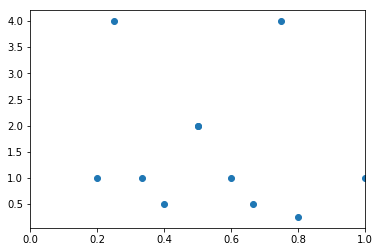

In [14]:
plot_m_step_rationals_0_to_n(1, 2, 5, padic.p_norm, True)